# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')


# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [5]:
sinasc_1=sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]
sinasc_1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [6]:
sinasc_1.groupby('munResNome')

In [7]:
sinasc_1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [8]:
sinasc_2=sinasc_raw[['PESO','SEXO','ESCMAE','DTNASC']]
sinasc_2.head()

,PESO,SEXO,ESCMAE,DTNASC
0,3685,Masculino,8 a 11 anos,2019-02-19
1,3055,Feminino,8 a 11 anos,2019-02-21
2,3460,Feminino,8 a 11 anos,2019-02-25
3,2982,Feminino,12 anos ou mais,2019-03-20
4,3310,Feminino,8 a 11 anos,2019-03-23


In [9]:
sinasc_2[sinasc_2['DTNASC'] == '2019-09-24'].groupby(['SEXO','DTNASC','ESCMAE']).mean()

PESO
SEXO      DTNASC     ESCMAE                      
Feminino  2019-09-24 1 a 3 anos       2260.000000
                     12 anos ou mais  3182.666667
                     4 a 7 anos       3427.500000
                     8 a 11 anos      3321.428571
Masculino 2019-09-24 1 a 3 anos       3522.500000
                     12 anos ou mais  3467.625000
                     4 a 7 anos       2902.222222
                     8 a 11 anos      3340.300000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [10]:
sinasc_3=sinasc_raw[['IDADEMAE','IDADEPAI','SEXO','munResNome']]
sinasc_3.head()

,IDADEMAE,IDADEPAI,SEXO,munResNome
0,19,26.0,Masculino,Alta Floresta D'Oeste
1,29,24.0,Feminino,Alta Floresta D'Oeste
2,37,32.0,Feminino,Alta Floresta D'Oeste
3,30,24.0,Feminino,Alto Alegre dos Parecis
4,30,27.0,Feminino,Alta Floresta D'Oeste


In [11]:
sinasc_3.groupby('munResNome')['SEXO'].count().sort_values(ascending=True)
# O município com menos bebe é Município ignorado - RO, caso inválido, o de Castanheiras

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        44
Rio Crespo                     50
São Felipe D'Oeste             54
Teixeirópolis                  64
Cacaulândia                    75
Cabixi                         80
Vale do Paraíso                81
Ministro Andreazza             84
Vale do Anari                  93
Theobroma                      97
Novo Horizonte do Oeste        98
Santa Luzia D'Oeste            99
Nova União                    104
Itapuã do Oeste               109
Governador Jorge Teixeira     112
Corumbiara                    127
Alto Alegre dos Parecis       154
Chupinguaia                   162
Mirante da Serra              164
Campo Novo de Rondônia        166
Seringueiras                  168
Urupá                         170
Monte Negro                   199
Cujubim                       205
Alvorada D'Oeste              205
Col

In [12]:
sinasc_3[sinasc_3['munResNome'] == 'Município ignorado - RO'].groupby('munResNome').aggregate(['min', np.median, max]) # Caso for Município ignorado - RO

IDADEMAE            IDADEPAI             
                             min median max      min median   max
munResNome                                                       
Município ignorado - RO       24   24.0  24     22.0   22.0  22.0

In [13]:
sinasc_3[sinasc_3['munResNome'] == 'Castanheiras'].groupby('munResNome').aggregate(['min', np.median, max]) # Caso for Castanheiras

IDADEMAE            IDADEPAI             
                  min median max      min median   max
munResNome                                            
Castanheiras       17   27.0  39     17.0   31.5  43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [14]:
sinasc_4=sinasc_raw[['DTNASC','munResNome','QTDFILVIVO','IDADEPAI']]
sinasc_4.head()

,DTNASC,munResNome,QTDFILVIVO,IDADEPAI
0,2019-02-19,Alta Floresta D'Oeste,0.0,26.0
1,2019-02-21,Alta Floresta D'Oeste,1.0,24.0
2,2019-02-25,Alta Floresta D'Oeste,2.0,32.0
3,2019-03-20,Alto Alegre dos Parecis,0.0,24.0
4,2019-03-23,Alta Floresta D'Oeste,1.0,27.0


In [15]:
# Alterando o formato da coluna para data
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])

In [16]:
sinasc_4[sinasc_4['DTNASC'].dt.month == 3].groupby('munResNome')['DTNASC'].count().sort_values(ascending=False)
# A cidade do mes de março com mais nascimento foi Porto Velho

munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

In [17]:
sinasc_4[sinasc_4['munResNome'] == 'Porto Velho'].groupby('munResNome')['QTDFILVIVO','IDADEPAI'].aggregate(['min', np.median, max])

QTDFILVIVO              IDADEPAI             
                   min median   max      min median   max
munResNome                                               
Porto Velho        0.0    1.0  12.0     16.0   32.0  65.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

In [18]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [19]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [20]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [21]:
sinasc_raw[['IDADEMAE','SEXO']].groupby('IDADEMAE').describe()

SEXO                       
         count unique        top freq
IDADEMAE                             
11           1      1  Masculino    1
12           7      2  Masculino    4
13          27      2   Feminino   14
14         163      2  Masculino   82
15         354      2  Masculino  195
16         634      2  Masculino  343
17         911      2  Masculino  481
18        1108      2  Masculino  602
19        1352      2  Masculino  691
20        1466      2  Masculino  774
21        1435      2   Feminino  732
22        1446      2  Masculino  729
23        1481      2  Masculino  749
24        1517      2   Feminino  767
25        1570      2  Masculino  799
26        1503      2  Masculino  777
27        1390      2  Masculino  720
28        1312      2  Masculino  673
29        1225      2  Masculino  655
30        1164      2  Masculino  620
31        1088      2  Masculino  570
32        1061      2  Masculino  542
33         897      2  Masculino  454
34         769      2  Masculino  402
35         744      2   Feminino  374
36         622      2   Feminino  314
37         520      2   Feminino  269
38         382      2  Masculino  201
39         307      2   Feminino  156
40         226      2  Masculino  116
41         128      2   Feminino   72
42         113      2   Feminino   60
43          44      2   Feminino   22
44          35      2  Masculino   18
45           8      2   Feminino    4
46           5      2   Feminino    3
47           5      2  Masculino    3
51           1      1   Feminino    1
52           1      1  Masculino    1
53           2      2  Masculino    1

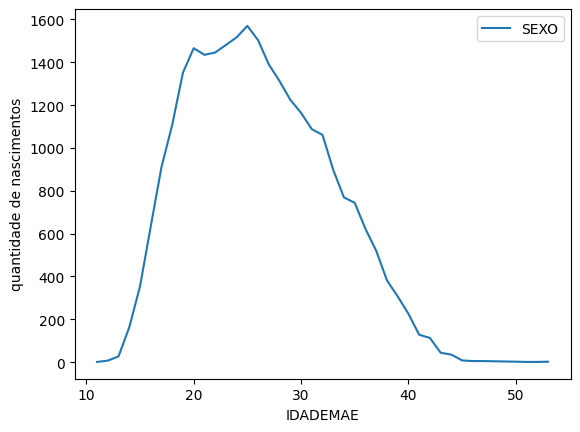

In [22]:
sinasc_raw[['IDADEMAE','SEXO']].groupby('IDADEMAE').count().plot()
plt.ylabel('quantidade de nascimentos');

Observa-se que a Idade da Mãe possui maior valor aos 25 anos. Assim vendo que estão concentrados os valores acima de 1000 na faixa dos 18 e 32 anos.

In [23]:
sinasc_raw[['ESCMAE','SEXO']].groupby('ESCMAE').describe()

SEXO                        
                 count unique        top  freq
ESCMAE                                        
1 a 3 anos         516      2  Masculino   285
12 anos ou mais   5767      2  Masculino  2951
4 a 7 anos        4759      2  Masculino  2489
8 a 11 anos      15630      2  Masculino  7976
Nenhuma             40      2  Masculino    22

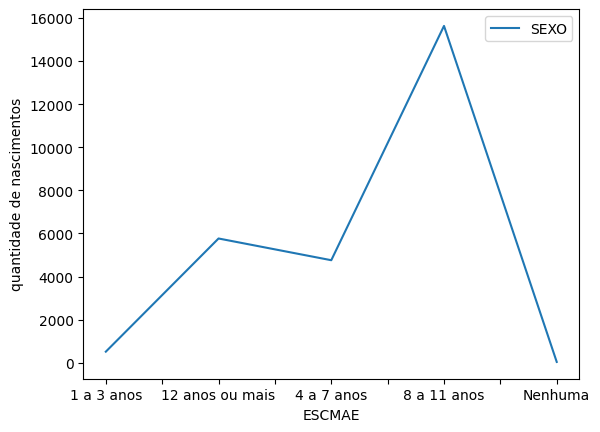

In [24]:
sinasc_raw[['ESCMAE','SEXO']].groupby('ESCMAE').count().plot()
plt.ylabel('quantidade de nascimentos');

Observa-se que a Escolaridade da Mãe possui maior valor em 8 a 11 anos. Tendo valores significativos na faixa dos 4 a 7 anos até 12 anos ou mais.

In [25]:
sinasc_raw[['IDADEMAE','PARTO']].groupby('PARTO').describe()

IDADEMAE                                                   
           count       mean       std   min   25%   50%   75%   max
PARTO                                                              
Cesáreo  18036.0  26.929752  6.322442  11.0  22.0  27.0  32.0  53.0
Vaginal   8943.0  24.399866  6.172537  12.0  20.0  23.0  28.0  53.0

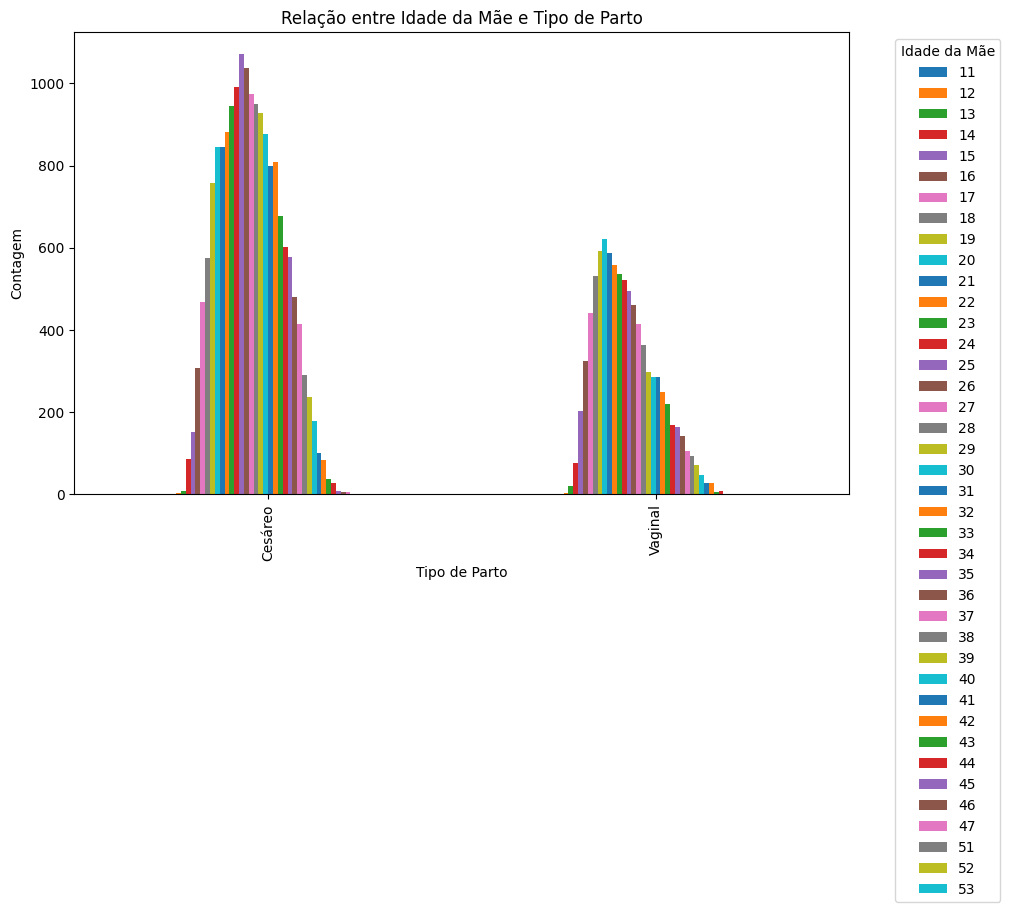

In [26]:
df_relacao = pd.crosstab(index=sinasc_raw['PARTO'], columns=sinasc_raw['IDADEMAE'])
# Plotando os valores para melhor visualização
df_relacao.plot(kind= 'bar', stacked=False, figsize=(10, 6))
plt.title("Relação entre Idade da Mãe e Tipo de Parto")
plt.xlabel("Tipo de Parto")
plt.ylabel("Contagem")
plt.legend(title='Idade da Mãe', bbox_to_anchor=(1.05, 1), loc='upper left')

Ao observar a relação da idade com o tipo de parto, sua média não foi muito significativa, deste modo usa-se o gráfico de barras para melhor visualização. Deste modo, o parto Vaginal ocorre em menor quantidade e possui seu ápice aos 20 anos, sendo mais presente em idades mais novas. Já o Cesáreo ocorre em maior quantidade, seu ápice aos 25 anos e é presente em todas as idades.